### Week 4 Evaluation Metrics For Classification

In the week 3 we did classification fro prediction churn. but now we are going to evaluate if it is good.

- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [54]:
data = !wget "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv" -O data-week-3.csv 
data

['--2025-11-05 01:14:15--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 977501 (955K) [text/plain]',
 "Saving to: 'data-week-3.csv'",
 '',
 '     0K .......... .......... .......... .......... ..........  5%  279K 3s',
 '    50K .......... .......... .......... .......... .......... 10%  377K 3s',
 '   100K .......... .......... .......... .......... .......... 15% 1.23M 2s',
 '   150K .......... .......... .......... .......... .......... 20% 1.15M 1s',
 '   200K .......... .......... .......... .......... .......... 26%  223K 2s',
 '   250K .......... .......... .......... .......... .......... 31% 2.85

In [55]:
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [56]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [57]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]


In [58]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\RANDY\Documents\data_eng_project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [59]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

### Accuracy and dummy model
- Evaluate the model on different thresholds
- Check the accuracy of dummy baselines

In [60]:
len(y_val)

1409

In [61]:
print((y_val == churn_decision).sum())
print((y_val == churn_decision).mean())

1131
0.8026969481902059


In [62]:
1131/1409

0.8026969481902059

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_val, y_pred >= 0.5)

0.8026969481902059

In [65]:
thresholds = np.linspace(0, 1, 21)

scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print(f"{t:.2f} {score:.3f}")
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.592
0.15 0.667
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.794
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


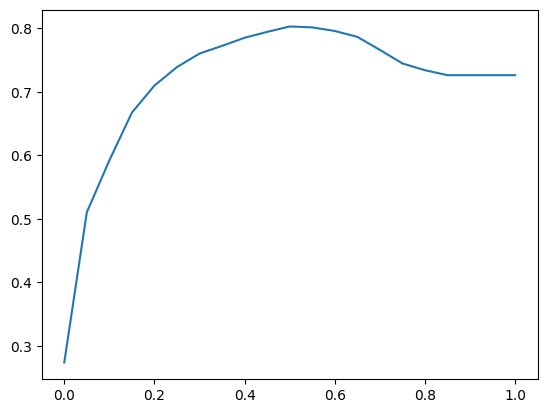

In [66]:
plt.plot(thresholds, scores)

In [67]:
from collections import Counter

In [68]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [69]:
1 - y_val.mean()

np.float64(0.7260468417317246)

### Confusion Tables
- Different types of errors and correct decisions
- Arranging them in a table

In [70]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [71]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [72]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [73]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[921, 102],
       [176, 210]])

In [74]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

In [75]:
y_pred1 = (model.predict_proba(X_val)[:, 1] > 0.5)

In [76]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred1)
cm/cm.sum()

array([[0.65365507, 0.07239177],
       [0.12491128, 0.14904187]])

### Precision and Recall
- **Precision** tell us the fraction of positive predictions that are correct. It takes into account only the **positive class** (TP and FP - second column of the confusion matrix), as is stated in the following formula:


$$P= \cfrac{TP}{TP + FN}$$

- **Recall** measures the fraction of correctly identified postive instances. It considers parts of the **positive and negative classes** (TP and FN - second row of confusion table). The formula of this metric is presented below:

$$R = \cfrac{TP}{TP + FN}$$

In [77]:
p = tp / (tp + fp)
p

np.float64(0.6730769230769231)

In [78]:
r = tp / (tp + fn)
r

np.float64(0.5440414507772021)

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_val, y_pred1)

0.6730769230769231

In [80]:
recall_score(y_val, y_pred1)

0.5440414507772021

In [81]:
f1_score(y_val, y_pred1)

0.6017191977077364

In [82]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred1)

### ROC curves
= ROC stands for Receiver Operating Characteristics, and this idea was applied during the world war II for strength of Radio Detectors. This measure the **False Positive Rate** (FPR) and **True Positive Rate** (TPR), we earlier determined these from the confusion matrix.

**FPR** is the fraction of false positives (FP) divided by the total number of negatives (FP and TN - the first row of confusion matrix), and we want to `minimize` it. The formula of FPR is the following: 

<p align="center">
    $FPR = \large \frac{FP}{TN + FP}$
</p>

In the other hand, **TPR** or **Recall** is the fraction of true positives (TP) divided by the total number of positives (FN and TP - second row of confusion table), and we want to `maximize` this metric. The formula of this measure is presented below: 

<p align="center">
    $TPR =\large \frac{TP}{TP + FN}$
</p>


In [83]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred1)

In [84]:
thresholds

array([inf,  1.,  0.])

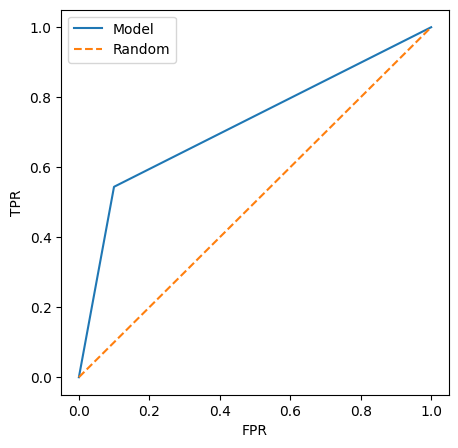

In [85]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()